In [1]:
# Importing the necessary packages
from pandas import read_csv
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

In [2]:
forest_data = pd.read_csv("forestfires.csv")

In [3]:
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
forest_data = forest_data.drop(columns=["month", "day"])


In [5]:
forest_data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
forest_data.shape

(517, 29)

In [7]:
forest_data.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [8]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [9]:
forest_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
forest_data.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [11]:
forest_data['size_category'].unique()

array(['small', 'large'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
forest_data["size_category"] = label_encoder.fit_transform(forest_data["size_category"])

In [13]:
forest_data.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1


In [14]:
forest_data['size_category'].unique()

array([1, 0])

In [15]:
forest_data.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1


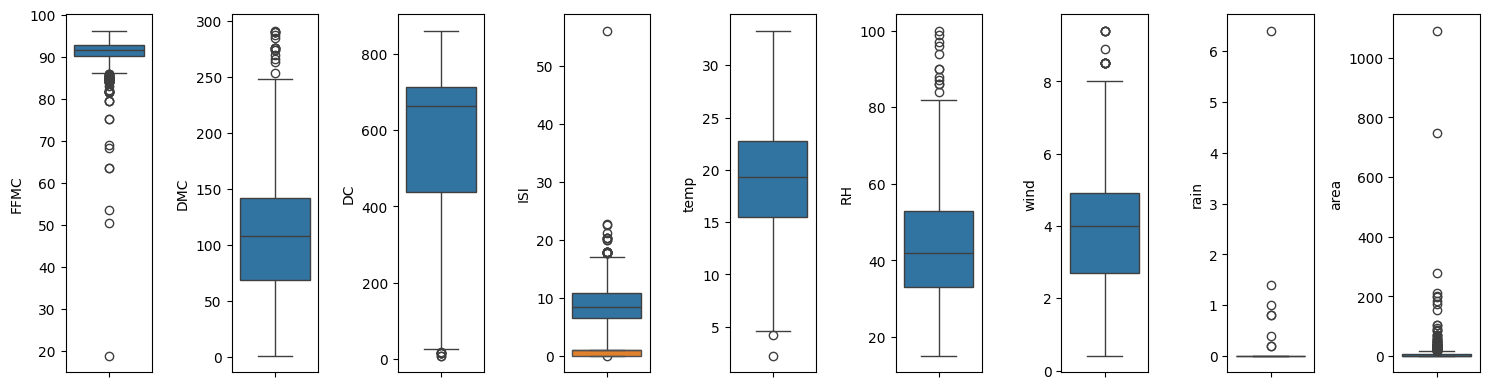

In [16]:

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 9, figsize=(15,4))
sns.boxplot(forest_data.FFMC, ax=ax[0])
sns.boxplot(forest_data.DMC, ax=ax[1])
sns.boxplot(forest_data.DC, ax=ax[2])
sns.boxplot(forest_data.ISI, ax=ax[3])
sns.boxplot(forest_data.temp, ax=ax[4])
sns.boxplot(forest_data.RH, ax=ax[5])
sns.boxplot(forest_data.wind, ax=ax[6])
sns.boxplot(forest_data.rain, ax=ax[7])
sns.boxplot(forest_data.area, ax=ax[8])
sns.boxplot(forest_data.size_category, ax=ax[3])
plt.tight_layout()
plt.show()

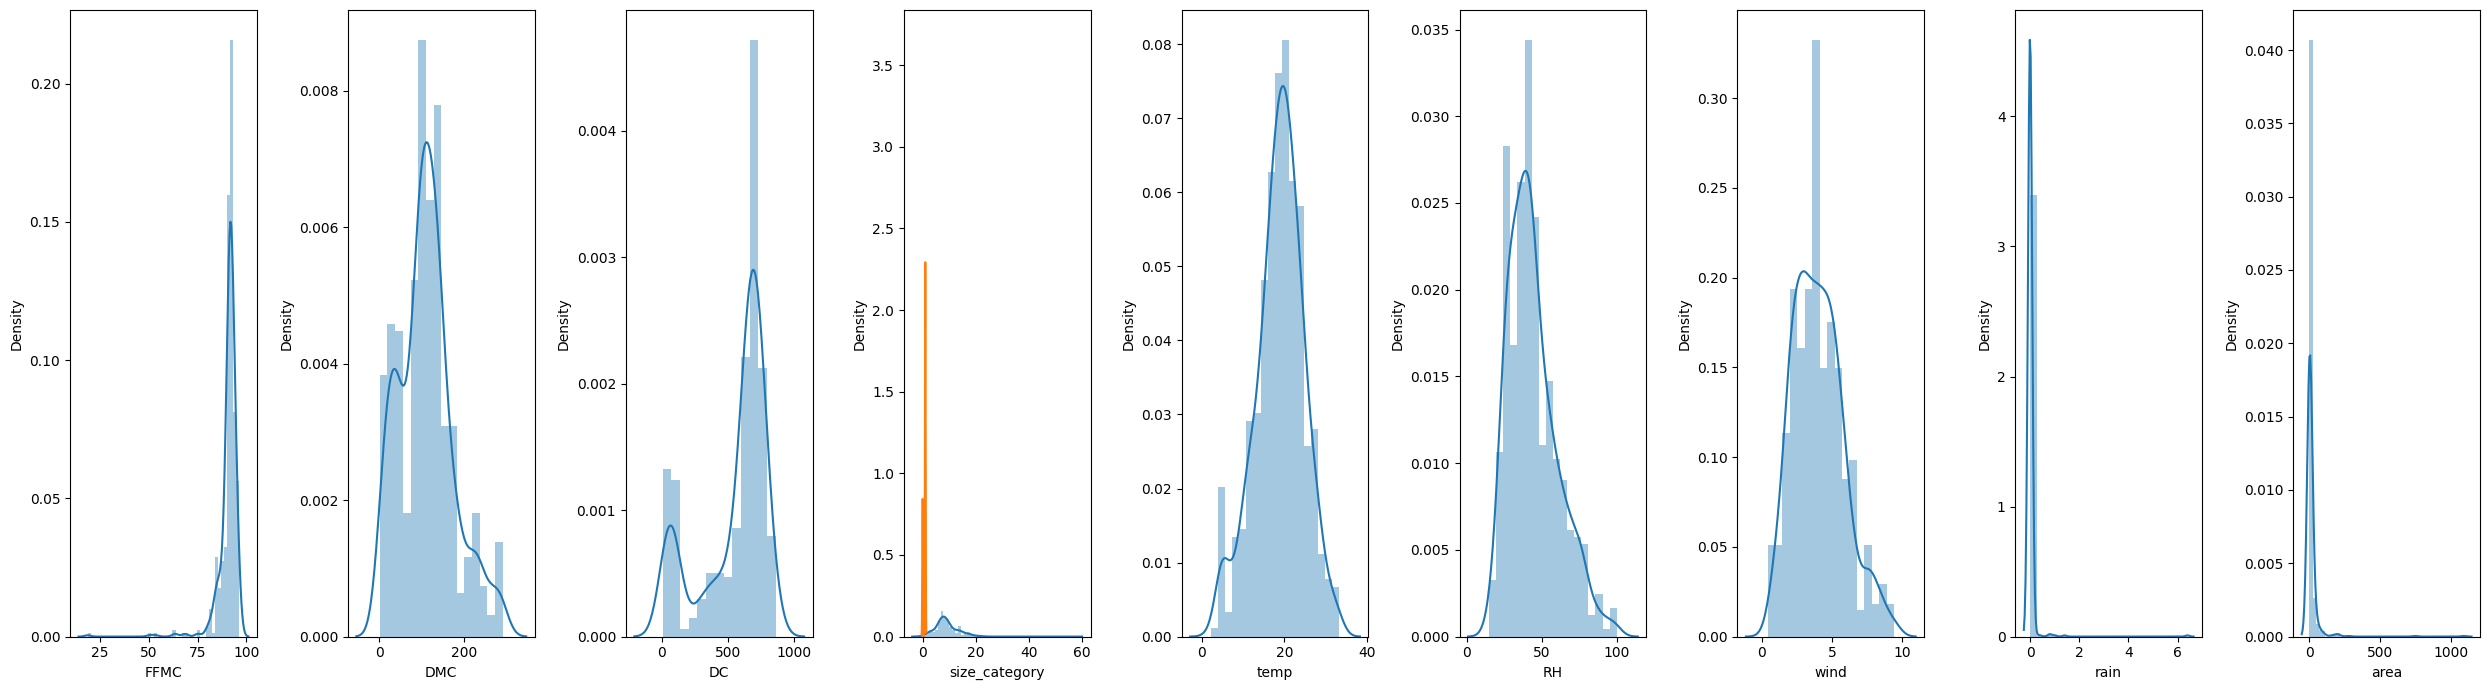

In [17]:
fig, ax = plt.subplots(1, 9, figsize=(25,7))
sns.distplot(forest_data.FFMC, ax=ax[0])
sns.distplot(forest_data.DMC, ax=ax[1])
sns.distplot(forest_data.DC, ax=ax[2])
sns.distplot(forest_data.ISI, ax=ax[3])
sns.distplot(forest_data.temp, ax=ax[4])
sns.distplot(forest_data.RH, ax=ax[5])
sns.distplot(forest_data.wind, ax=ax[6])
sns.distplot(forest_data.rain, ax=ax[7])
sns.distplot(forest_data.area, ax=ax[8])
sns.distplot(forest_data.size_category, ax=ax[3])
plt.tight_layout()
plt.show()

In [18]:
from scipy import stats

# Assuming 'forest_data' is your DataFrame with 10 columns
columns_to_transform = forest_data.columns

# Loop through each column and apply Box-Cox transformation
transformed_data = forest_data.copy()  # Create a copy of the original DataFrame
const = 0.01  # Small constant value to shift the data

for column in columns_to_transform:
    # Skip non-numeric columns or columns with constant values
    if not forest_data[column].dtype.kind in 'biufc':
        continue

    # Shift the data to make it strictly positive
    shifted_data = forest_data[column] + const

    # Apply Box-Cox transformation to the current column
    transformed_data[column], lambda_value = stats.boxcox(shifted_data)

    # Print the lambda value (the parameter used in the Box-Cox transformation) for each column
    print(f"Lambda value for {column}: {lambda_value}")

# Check the skewness of the transformed data for each column
for column in columns_to_transform:
    skewness_after = stats.skew(transformed_data[column])
    print(f"Skewness after transformation for {column}: {skewness_after}")



Lambda value for FFMC: 12.702863717672615
Lambda value for DMC: 0.6361666581068215
Lambda value for DC: 1.4417017508079415
Lambda value for ISI: 0.51363735598727
Lambda value for temp: 1.2682630667260095
Lambda value for RH: -0.03085596557907177
Lambda value for wind: 0.484371220549491
Lambda value for rain: -14.93424369145142
Lambda value for area: -0.06090101686442037
Lambda value for dayfri: -1.2981204653434717
Lambda value for daymon: -1.503638319042066
Lambda value for daysat: -1.314825561526968
Lambda value for daysun: -1.147762473534593
Lambda value for daythu: -1.8331536275757876
Lambda value for daytue: -1.7458923391657677
Lambda value for daywed: -2.0731128997748343
Lambda value for monthapr: -12.447008511679707
Lambda value for monthaug: -0.3949560324805533
Lambda value for monthdec: -12.447008567552603
Lambda value for monthfeb: -5.601153499510432
Lambda value for monthjan: -56.011532703519116
Lambda value for monthjul: -3.500715632671944
Lambda value for monthjun: -6.58959

In [19]:
transformed_data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,3.042449e+23,10.982906,486.664187,2.553125,10.598756,3.702854,3.126602,-4.946570e+28,-5.315806,0.009886,...,-2.844654e+10,-1.882730e+110,-2.865988e+06,-2.292591e+12,0.009848,-1.882730e+110,-1.342073e+154,-1.156628e+14,-16.290637,0.009985
1,5.725851e+23,13.631157,8215.095741,3.228919,30.051375,3.314768,-0.092189,-4.946570e+28,-5.315806,-303.266302,...,-2.844654e+10,-1.882730e+110,-2.865988e+06,-2.292591e+12,-6754.167557,-1.882730e+110,-1.342073e+154,9.589611e-03,-16.290637,0.009985
2,5.725851e+23,15.810572,8532.037066,3.228919,22.863827,3.314768,0.288482,-4.946570e+28,-5.315806,-303.266302,...,-2.844654e+10,-1.882730e+110,-2.865988e+06,-2.292591e+12,-6754.167557,-1.882730e+110,-1.342073e+154,9.589611e-03,-16.290637,0.009985
3,6.674368e+23,13.051214,366.601303,4.074893,10.774950,4.266595,1.980923,-8.870722e+08,-5.315806,0.009886,...,-2.844654e+10,-1.882730e+110,-2.865988e+06,-2.292591e+12,0.009848,-1.882730e+110,-1.342073e+154,-1.156628e+14,-16.290637,0.009985
4,4.765586e+23,17.676838,546.592844,4.277635,16.498017,4.284309,0.687375,-4.946570e+28,-5.315806,-303.266302,...,-2.844654e+10,-1.882730e+110,-2.865988e+06,-2.292591e+12,0.009848,-1.882730e+110,-1.342073e+154,-1.156628e+14,-16.290637,0.009985


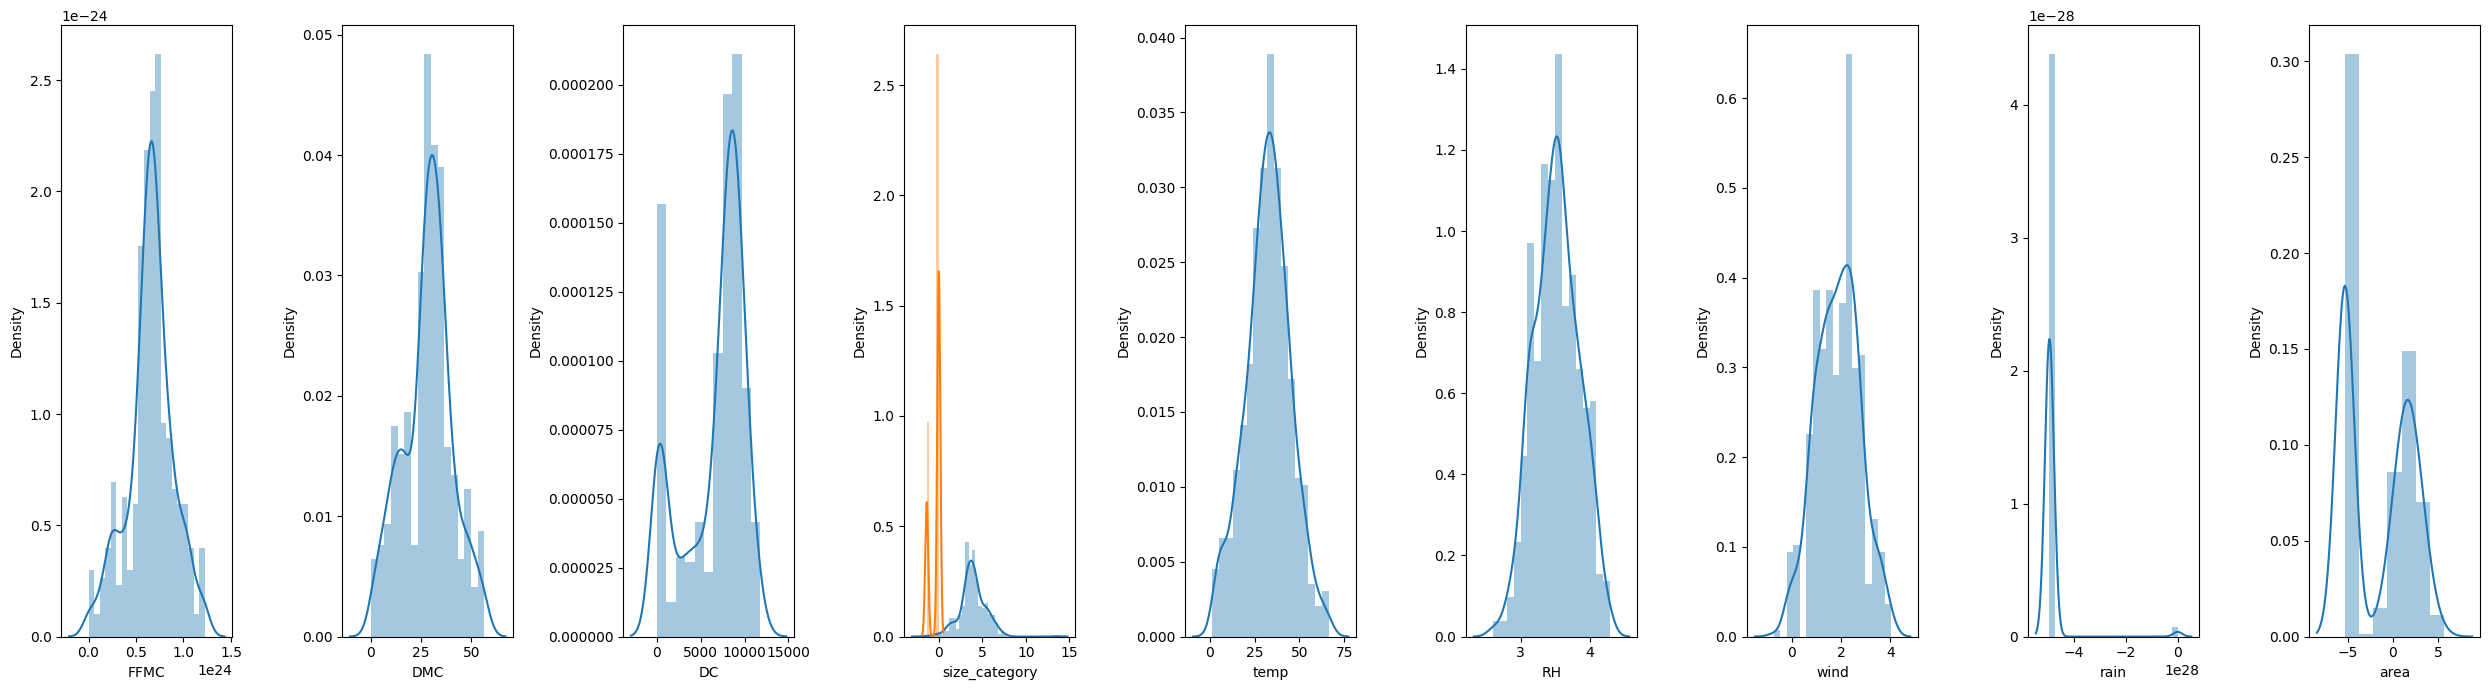

In [20]:
fig, ax = plt.subplots(1, 9, figsize=(25,7))
sns.distplot(transformed_data.FFMC, ax=ax[0])
sns.distplot(transformed_data.DMC, ax=ax[1])
sns.distplot(transformed_data.DC, ax=ax[2])
sns.distplot(transformed_data.ISI, ax=ax[3])
sns.distplot(transformed_data.temp, ax=ax[4])
sns.distplot(transformed_data.RH, ax=ax[5])
sns.distplot(transformed_data.wind, ax=ax[6])
sns.distplot(transformed_data.rain, ax=ax[7])
sns.distplot(transformed_data.area, ax=ax[8])
sns.distplot(transformed_data.size_category, ax=ax[3])
plt.tight_layout()
plt.show()

In [21]:
X = transformed_data.drop('size_category', axis=1)  # Drop the 'size_category' column
y = transformed_data['size_category']  # Select only the 'size_category' column as the target variable


In [22]:
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [23]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,517.000000,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,1.443075e-16,-1.099486e-16,-2.198972e-16,-1.700767e-16,-4.535379e-16,8.795887e-16,2.095895e-16,6.562556e-16,0.000000,-1.546152e-16,...,-1.676716e-15,-5.085122e-16,-2.733253e-15,2.061536e-16,-1.360614e-15,1.085742e-15,-2.745279e-15,-5.981890e-15,8.246144e-17,1.924100e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-2.745016e+00,-2.342477e+00,-1.923994e+00,-3.732516e+00,-2.502767e+00,-2.859337e+00,-2.938246e+00,-1.253678e-01,-1.007295,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
25%,-4.732459e-01,-5.662743e-01,-6.325514e-01,-4.939642e-01,-6.282538e-01,-6.319883e-01,-6.794226e-01,-1.253678e-01,-1.007295,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
50%,1.762012e-02,7.917368e-02,4.353889e-01,-2.175979e-02,2.773592e-02,3.866298e-02,1.082233e-01,-1.253678e-01,0.278611,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
75%,5.591347e-01,5.662122e-01,6.944957e-01,5.055456e-01,6.636925e-01,6.808922e-01,5.777289e-01,-1.253678e-01,0.947188,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,1.416268e+00
max,2.402607e+00,2.323561e+00,1.505415e+00,6.302576e+00,2.722324e+00,2.410530e+00,2.439117e+00,7.976528e+00,2.025751,2.254407e+00,...,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,1.604681e+01,2.271563e+01,5.785038e+00,1.416268e+00


In [24]:
# Importing the necessary packages

!pip install keras==2.12.0
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [28]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(28, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [29]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=1.000 total time=   2.4s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.933 total time=   2.4s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.786 total time=   2.4s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.883 total time=   2.7s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.845 total time=   1.8s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=1.000 total time=   4.4s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=0.913 total time=   5.1s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.942 total time=   6.2s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.922 total time=   6.2s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=0.874 total time=   6.2s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=1.000 total time=  11.3s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


[CV 2/5; 3/9] END ....batch_size=10, epochs=100;, score=0.865 total time=   8.6s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


[CV 3/5; 3/9] END ....batch_size=10, epochs=100;, score=0.971 total time=  11.3s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


[CV 4/5; 3/9] END ....batch_size=10, epochs=100;, score=0.893 total time=   8.1s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=0.874 total time=  12.6s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=1.000 total time=   1.9s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


[CV 2/5; 4/9] END .....batch_size=20, epochs=10;, score=0.894 total time=   1.7s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


[CV 3/5; 4/9] END .....batch_size=20, epochs=10;, score=0.680 total time=   1.7s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


[CV 4/5; 4/9] END .....batch_size=20, epochs=10;, score=0.718 total time=   1.4s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=0.699 total time=   1.7s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=1.000 total time=   2.8s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


[CV 2/5; 5/9] END .....batch_size=20, epochs=50;, score=0.913 total time=   3.9s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


[CV 3/5; 5/9] END .....batch_size=20, epochs=50;, score=0.951 total time=   3.6s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


[CV 4/5; 5/9] END .....batch_size=20, epochs=50;, score=0.913 total time=   2.9s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


[CV 5/5; 5/9] END .....batch_size=20, epochs=50;, score=0.883 total time=   3.7s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


[CV 1/5; 6/9] END ....batch_size=20, epochs=100;, score=1.000 total time=   4.8s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


[CV 2/5; 6/9] END ....batch_size=20, epochs=100;, score=0.904 total time=   4.7s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


[CV 3/5; 6/9] END ....batch_size=20, epochs=100;, score=0.932 total time=   6.2s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


[CV 4/5; 6/9] END ....batch_size=20, epochs=100;, score=0.922 total time=   4.7s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


[CV 5/5; 6/9] END ....batch_size=20, epochs=100;, score=0.903 total time=   5.4s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


[CV 1/5; 7/9] END .....batch_size=40, epochs=10;, score=1.000 total time=   1.3s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


[CV 2/5; 7/9] END .....batch_size=40, epochs=10;, score=0.750 total time=   1.4s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


[CV 3/5; 7/9] END .....batch_size=40, epochs=10;, score=0.524 total time=   2.0s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.680 total time=   1.4s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.699 total time=   1.4s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=1.000 total time=   2.3s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.875 total time=   2.7s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.932 total time=   2.4s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.913 total time=   2.1s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.864 total time=   2.3s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=1.000 total time=   3.7s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.885 total time=   3.9s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.961 total time=   3.6s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.932 total time=   3.8s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.864 total time=   3.7s


In [30]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9322255373001098, using {'batch_size': 20, 'epochs': 100}
0.8894510865211487,0.0731443557479468 with: {'batch_size': 10, 'epochs': 10}
0.9302651166915894,0.04130368222425616 with: {'batch_size': 10, 'epochs': 50}
0.9206497311592102,0.05444740387652444 with: {'batch_size': 10, 'epochs': 100}
0.7982636332511902,0.1266521179668291 with: {'batch_size': 20, 'epochs': 10}
0.9322068810462951,0.040185217949411454 with: {'batch_size': 20, 'epochs': 50}
0.9322255373001098,0.03565380746309752 with: {'batch_size': 20, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 10}
0.9167475819587707,0.04837104867908678 with: {'batch_size': 40, 'epochs': 50}
0.9283793926239013,0.04953342987196372 with: {'batch_size': 40, 'epochs': 100}


In [31]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(28,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(28,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   2.2s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.817 total time=   1.6s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.621 total time=   1.3s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.796 total time=   1.9s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.767 total time=   1.7s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   1.3s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.740 total time=   2.1s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.524 total time=   1.3s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.806 total time=   1.4s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.738 total time=   1.4s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   1.3s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.750 total time=   1.6s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.583 total time=   1.7s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.689 total time=   1.4s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.748 total time=   1.4s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   1.4s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.750 total time=   1.8s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.524 total time=   2.0s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.728 total time=   1.3s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.699 total time=   2.2s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=1.000 total time=   1.4s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.779 total time=   1.5s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.621 total time=   1.4s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.786 total time=   1.5s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.728 total time=   1.4s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=   1.4s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.760 total time=   1.4s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.544 total time=   2.2s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.757 total time=   2.3s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.709 total time=   1.5s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   1.4s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.779 total time=   1.5s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.524 total time=   1.4s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.699 total time=   1.3s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.718 total time=   2.1s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=1.000 total time=   1.6s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.769 total time=   1.4s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.524 total time=   1.4s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.699 total time=   1.4s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.699 total time=   1.4s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   1.3s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.837 total time=   1.4s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.524 total time=   1.9s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.786 total time=   1.7s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.709 total time=   1.5s


In [32]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8003547549247741, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.8003547549247741,0.12109184447139214 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7616691589355469,0.15239983315961048 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7538835048675537,0.13723017809316976 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7402912616729737,0.15235295838878546 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7829536914825439,0.12349375286361539 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7538648128509522,0.14617623454445164 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7441187500953674,0.15343141674025132 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7383121848106384,0.15384151134789484 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7711911797523499,0.15602875394547824 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [33]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(28,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(28,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   2.3s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   1.7s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   1.5s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.680 total time=   2.2s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   1.3s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=1.000 total time=   1.5s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.750 total time=   2.6s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.524 total time=   1.6s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.680 total time=   1.5s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.699 total time=   1.5s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=1.000 total time=   2.3s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.750 total time=   1.4s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.524 total time=   1.5s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.680 total time=   1.5s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.699 total time=   1.4s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=1.000 total time=   1.3s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.788 total time=   1.4s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.612 total time=   1.5s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.786 total time=   1.9s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.699 total time=   1.5s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=1.000 total time=   1.5s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.808 total time=   1.4s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.612 total time=   1.3s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.689 total time=   1.4s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.709 total time=   1.3s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=1.000 total time=   1.5s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.750 total time=   1.9s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.524 total time=   1.7s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.680 total time=   1.5s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.699 total time=   1.5s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=   1.5s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.885 total time=   1.5s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.903 total time=   1.5s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=0.874 total time=   1.4s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.845 total time=   1.9s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=1.000 total time=   2.9s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.856 total time=   1.5s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.893 total time=   1.5s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.854 total time=   1.5s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.874 total time=   1.5s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=1.000 total time=   1.5s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.750 total time=   2.3s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.524 total time=   1.4s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.680 total time=   2.3s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.699 total time=   1.4s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   1.4s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.885 total time=   1.3s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.942 total time=   1.5s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.854 total time=   2.1s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.835 total time=   1.6s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   1.4s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.856 total time=   1.5s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=0.864 total time=   1.4s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.845 total time=   1.4s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=1.000 total time=   1.5s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.750 total time=   2.1s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.524 total time=   1.5s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.680 total time=   1.5s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.699 total time=   1.5s


In [34]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9031366586685181, using {'activation_function': 'linear', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7771097898483277,0.12912686416705257 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7634801983833313,0.1337497629458873 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.9011949181556702,0.05289173019251048 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.8954256772994995,0.054161381021538 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9031366586685181,0.06040506448537436 with: {'activatio

In [36]:
 #Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   4.0s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.750 total time=   3.0s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.583 total time=   2.8s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.680 total time=   2.8s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.699 total time=   1.4s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=1.000 total time=   1.4s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.740 total time=   1.5s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.631 total time=   3.2s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.680 total time=   1.6s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.689 total time=   2.2s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.990 total time=   1.7s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.750 total time=   1.5s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.592 total time=   1.6s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.680 total time=   1.4s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.689 total time=   1.4s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.981 total time=   1.4s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.750 total time=   1.5s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.641 total time=   1.9s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.796 total time=   1.7s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.718 total time=   1.5s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=1.000 total time=   1.4s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.779 total time=   1.5s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.592 total time=   1.5s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.806 total time=   1.4s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.767 total time=   1.5s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=1.000 total time=   2.3s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.769 total time=   1.5s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.680 total time=   1.5s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.777 total time=   1.4s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.757 total time=   1.5s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.990 total time=   1.4s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.779 total time=   1.5s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.689 total time=   1.6s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.806 total time=   2.2s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.777 total time=   1.5s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=1.000 total time=   1.5s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.827 total time=   1.4s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.709 total time=   1.5s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.816 total time=   1.4s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.816 total time=   1.5s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=1.000 total time=   1.9s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.827 total time=   1.8s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.757 total time=   1.4s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.816 total time=   1.4s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.825 total time=   1.4s


In [37]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8449962615966797, using {'neuron1': 16, 'neuron2': 8}
0.7422330141067505,0.1398563772132054 with: {'neuron1': 4, 'neuron2': 2}
0.7480769157409668,0.1306562972030669 with: {'neuron1': 4, 'neuron2': 4}
0.7403099298477173,0.1347903941934722 with: {'neuron1': 4, 'neuron2': 8}
0.7772218108177185,0.11366739014035106 with: {'neuron1': 8, 'neuron2': 2}
0.7887789368629455,0.12969859140442888 with: {'neuron1': 8, 'neuron2': 4}
0.7965645909309387,0.10746990160056198 with: {'neuron1': 8, 'neuron2': 8}
0.8082150816917419,0.09917984168079416 with: {'neuron1': 16, 'neuron2': 2}
0.8333457827568054,0.09378329884819937 with: {'neuron1': 16, 'neuron2': 4}
0.8449962615966797,0.08161482651683885 with: {'neuron1': 16, 'neuron2': 8}
